Segmentación del Problema:

En este proyecto, tras realizar un EDA preliminar con todos los datos obtenidos, hemos decidido segmentar el conjunto de datos de viajes ocasionales en Chile para enfocarnos en el "segmento intermedio" de comunas (25% > Total de Viajes Ocasionales < 75%). Esta decisión se basa en la observación de que el conjunto de datos contiene una gran diversidad entre las comunas, con algunas alcanzando volúmenes muy altos de viajes y otras significativamente bajos. Este desequilibrio puede dificultar el desarrollo de un modelo de predicción generalizado, ya que las comunas con muy pocos viajes no tienen suficientes datos para entrenar un modelo robusto, mientras que las de muy alto volumen podrían dominar el proceso de aprendizaje.

Al concentrarnos en las comunas intermedias, buscamos un equilibrio en la distribución de los datos, lo que permite entrenar un modelo que pueda generalizar mejor para predicciones de viajes ocasionales más realistas en comunas con un comportamiento de viaje "promedio". Este enfoque, al segmentar el conjunto de datos según los niveles de viajes, permite una mejor precisión en la predicción para esas comunas intermedias, al reducir el ruido que podría ser causado por los extremos.

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')

df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,Alta,1061.580205,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,Alta,1061.580205,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,Alta,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2023,12,diciembre,17,Alta,833.567298,833.567298
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2023,12,diciembre,44,Alta,833.567298,833.567298
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,108,Alta,833.567298,833.567298
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,47,Alta,833.567298,833.567298


In [263]:
df.shape

(2952624, 20)

In [264]:
total_combinaciones_viajes = df.groupby(['Comuna Origen','Comuna Destino','Anio','CUT Mes'])['Viajes Ocasionales'].sum().reset_index()
total_combinaciones_viajes.sort_values(by='Anio')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
1144007,Limache,El Bosque,2019,6,5
1402882,Marchihue,Santiago,2019,5,45
1402881,Marchihue,Santiago,2019,4,28
1402880,Marchihue,Santiago,2019,3,38
1402879,Marchihue,Santiago,2019,2,52
...,...,...,...,...,...
1098714,Las Condes,Collipulli,2024,1,30
1098715,Las Condes,Collipulli,2024,2,40
1098716,Las Condes,Collipulli,2024,3,29
1098626,Las Condes,Colbún,2024,3,234


In [265]:
total_combinaciones_viajes.describe()

,Anio,CUT Mes,Viajes Ocasionales
count,2.952624e+06,2.952624e+06,2.952624e+06
mean,2.021311e+03,6.312101e+00,5.737242e+01
std,1.541107e+00,3.446936e+00,2.221494e+02
min,2.019000e+03,1.000000e+00,1.000000e+00
25%,2.020000e+03,3.000000e+00,6.000000e+00
50%,2.021000e+03,6.000000e+00,1.300000e+01
75%,2.023000e+03,9.000000e+00,3.700000e+01
max,2.024000e+03,1.200000e+01,2.185900e+04


In [266]:
def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'\nRango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')
    
col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,total_combinaciones_viajes)

print('\n',total_combinaciones_viajes[total_combinaciones_viajes[col_a_analizar]>=83].count())
print('\n',total_combinaciones_viajes[total_combinaciones_viajes[col_a_analizar]<0].count())


Rango Intercuratílico: 31.0
Límite superior: 83.5 
Límite inferior: -40.5

 Comuna Origen         380288
Comuna Destino        380288
Anio                  380288
CUT Mes               380288
Viajes Ocasionales    380288
dtype: int64

 Comuna Origen         0
Comuna Destino        0
Anio                  0
CUT Mes               0
Viajes Ocasionales    0
dtype: int64


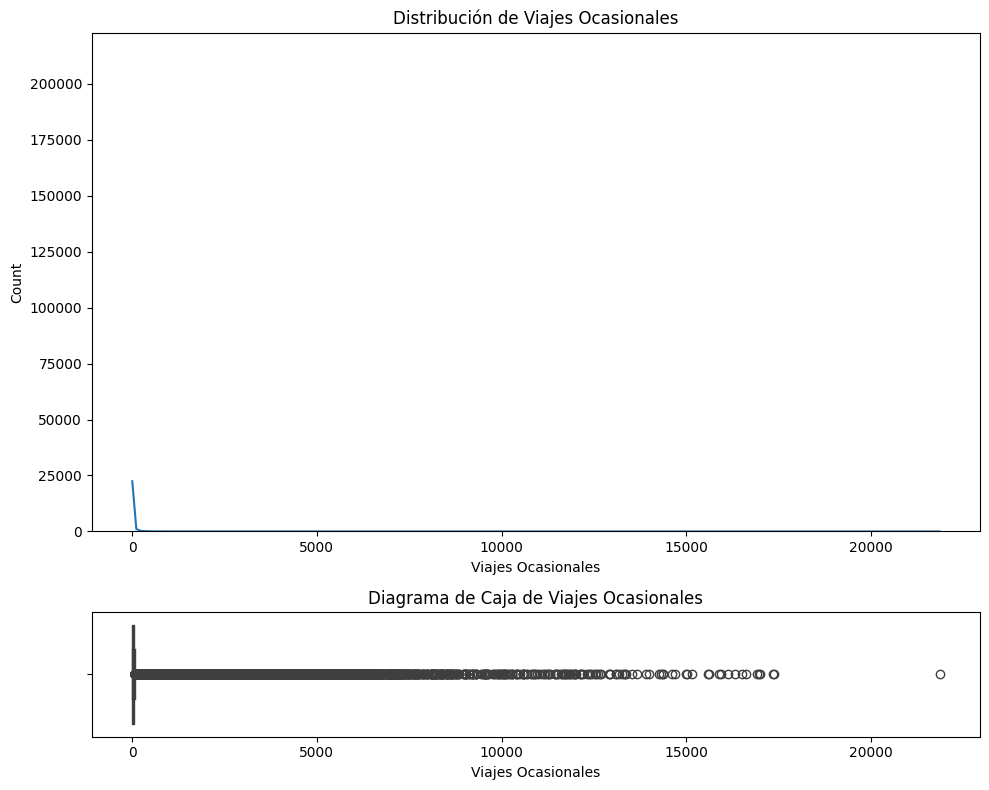

In [267]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [268]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']<83)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
918482,Isla de Pascua,La Granja,2023,3,1
404372,Cochrane,Puente Alto,2022,3,1
404379,Cochrane,Puente Alto,2022,10,1
404380,Cochrane,Puente Alto,2022,11,1
1412722,María Elena,Illapel,2019,5,1
...,...,...,...,...,...
2450367,San Miguel,Graneros,2022,4,82
2828695,Villa Alegre,Pelluhue,2023,8,82
744541,Estación Central,La Estrella,2022,2,82
1780231,Peñalolén,Calle Larga,2023,2,82


In [269]:
total_combinaciones_viajes_prueba.describe()

,Anio,CUT Mes,Viajes Ocasionales
count,2.572336e+06,2.572336e+06,2.572336e+06
mean,2.021286e+03,6.384961e+00,1.752767e+01
std,1.523643e+00,3.391220e+00,1.776842e+01
min,2.019000e+03,1.000000e+00,1.000000e+00
25%,2.020000e+03,4.000000e+00,5.000000e+00
50%,2.021000e+03,6.000000e+00,1.000000e+01
75%,2.023000e+03,9.000000e+00,2.300000e+01
max,2.024000e+03,1.200000e+01,8.200000e+01


In [270]:
col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,total_combinaciones_viajes_prueba)

print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]>=60].count())
print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]<0].count())


Rango Intercuratílico: 18.0
Límite superior: 50.0 
Límite inferior: -22.0

 Comuna Origen         124872
Comuna Destino        124872
Anio                  124872
CUT Mes               124872
Viajes Ocasionales    124872
dtype: int64

 Comuna Origen         0
Comuna Destino        0
Anio                  0
CUT Mes               0
Viajes Ocasionales    0
dtype: int64


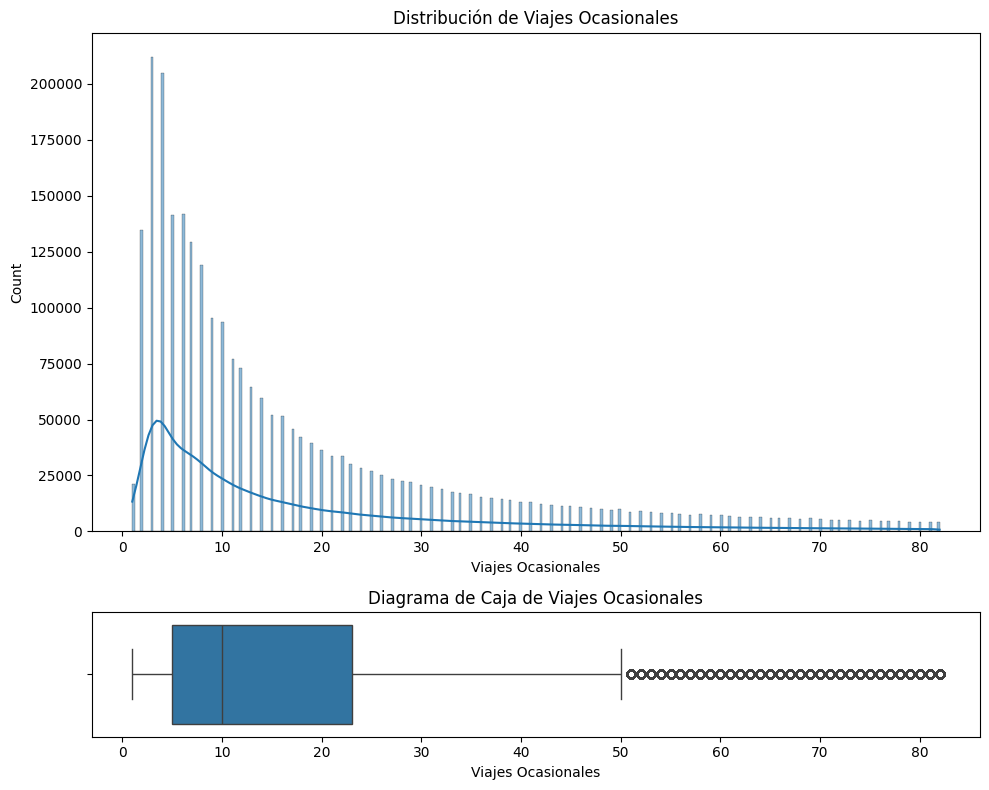

In [271]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [290]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']<35)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
2476686,San Pedro de Atacama,Diego de Almagro,2022,1,1
703103,El Carmen,Ercilla,2020,12,1
2265780,Río Hurtado,Las Condes,2021,1,1
2265784,Río Hurtado,Las Condes,2021,5,1
2265786,Río Hurtado,Las Condes,2021,7,1
...,...,...,...,...,...
2624903,Talca,Pedro Aguirre Cerda,2020,6,34
1016625,La Reina,San Felipe,2023,4,34
370934,Chimbarongo,Colina,2019,3,34
166771,Calama,Vitacura,2019,8,34


In [291]:
total_combinaciones_viajes_prueba.describe()

,Anio,CUT Mes,Viajes Ocasionales
count,2.175261e+06,2.175261e+06,2.175261e+06
mean,2.021266e+03,6.441284e+00,1.105235e+01
std,1.504525e+00,3.340612e+00,8.295421e+00
min,2.019000e+03,1.000000e+00,1.000000e+00
25%,2.020000e+03,4.000000e+00,4.000000e+00
50%,2.021000e+03,6.000000e+00,8.000000e+00
75%,2.023000e+03,9.000000e+00,1.600000e+01
max,2.024000e+03,1.200000e+01,3.400000e+01


In [293]:
col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,total_combinaciones_viajes_prueba)

print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]>34].count())
print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]<0].count())


Rango Intercuratílico: 12.0
Límite superior: 34.0 
Límite inferior: -14.0

 Comuna Origen         0
Comuna Destino        0
Anio                  0
CUT Mes               0
Viajes Ocasionales    0
dtype: int64

 Comuna Origen         0
Comuna Destino        0
Anio                  0
CUT Mes               0
Viajes Ocasionales    0
dtype: int64


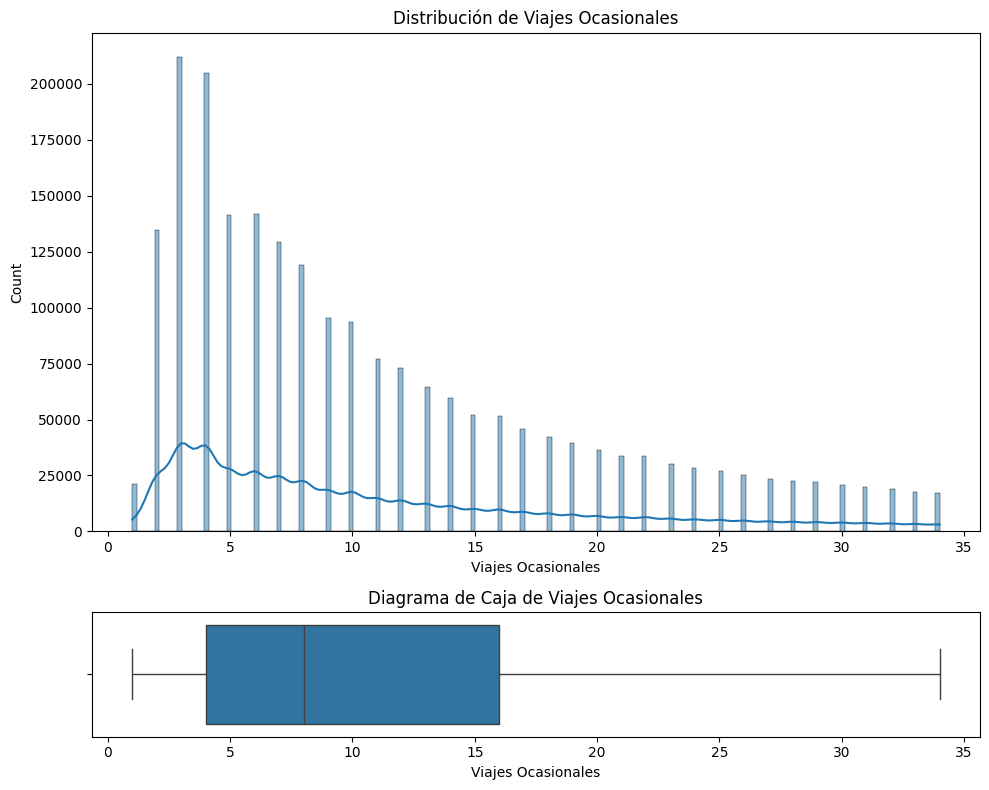

In [275]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [295]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba['Viajes Ocasionales']<35]
total_combinaciones_viajes_prueba

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
0,Aisén,Algarrobo,2023,1,2
1,Aisén,Algarrobo,2023,2,2
2,Aisén,Algarrobo,2023,3,2
3,Aisén,Algarrobo,2023,4,2
4,Aisén,Algarrobo,2023,5,2
...,...,...,...,...,...
2952612,Ñuñoa,Ñiquén,2023,7,26
2952613,Ñuñoa,Ñiquén,2023,8,16
2952616,Ñuñoa,Ñiquén,2023,11,13
2952620,Ñuñoa,Ñiquén,2024,3,30


In [303]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>35)&(total_combinaciones_viajes['Viajes Ocasionales']<160)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
36,Aisén,Ancud,2022,1,36
1783187,Peñalolén,Curepto,2021,6,36
1783204,Peñalolén,Curepto,2022,11,36
1783291,Peñalolén,Dalcahue,2019,2,36
1783322,Peñalolén,Dalcahue,2021,9,36
...,...,...,...,...,...
110119,Buin,Lo Barnechea,2023,2,159
1110584,Las Condes,San Esteban,2020,9,159
1864708,Providencia,Calama,2022,11,159
109440,Buin,Lampa,2024,1,159


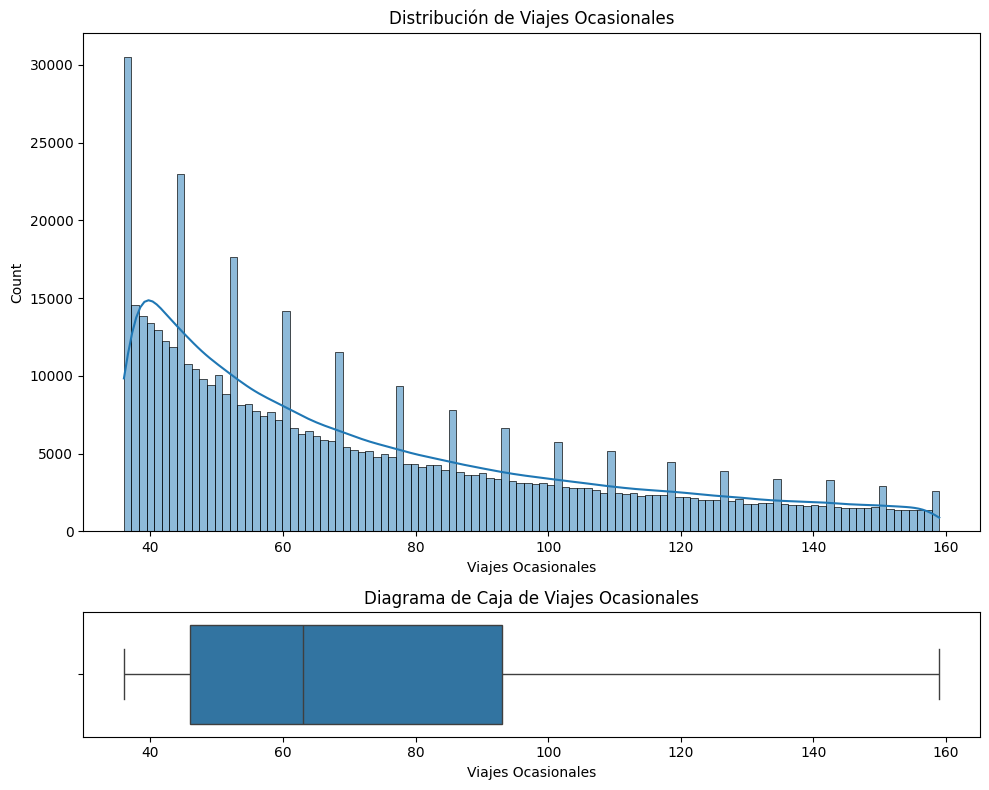

In [304]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [309]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>160)&(total_combinaciones_viajes['Viajes Ocasionales']<600)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
2629413,Talca,San Fernando,2021,4,161
165565,Calama,Taltal,2021,8,161
1012289,La Reina,Olmué,2022,6,161
2758986,Valdivia,Maipú,2024,1,161
1792489,Peñalolén,Rengo,2021,2,161
...,...,...,...,...,...
1903538,Pudahuel,Cartagena,2022,3,599
2808777,Victoria,Temuco,2022,4,599
2664838,Temuco,Mariquina,2023,11,599
564809,Copiapó,Huasco,2024,6,599


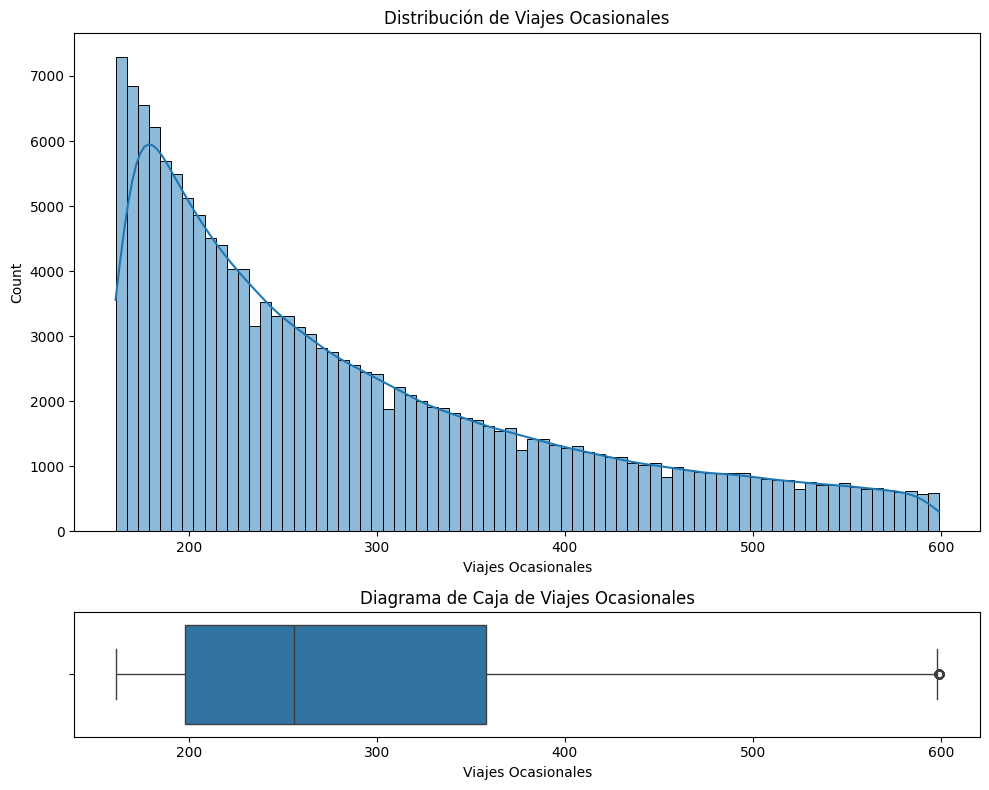

In [310]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [318]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>600)&(total_combinaciones_viajes['Viajes Ocasionales']<1850)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
175677,Caldera,Copiapó,2024,4,601
1921700,Puente Alto,Chimbarongo,2023,3,601
1933234,Puente Alto,Rengo,2021,11,601
1609591,Padre Hurtado,Las Cabras,2023,2,601
266484,Cauquenes,San Javier,2019,7,601
...,...,...,...,...,...
2673893,Temuco,Victoria,2019,12,1849
693667,El Bosque,Melipilla,2024,2,1849
63689,Antofagasta,La Serena,2023,12,1849
1203294,Lo Barnechea,Santo Domingo,2024,1,1849


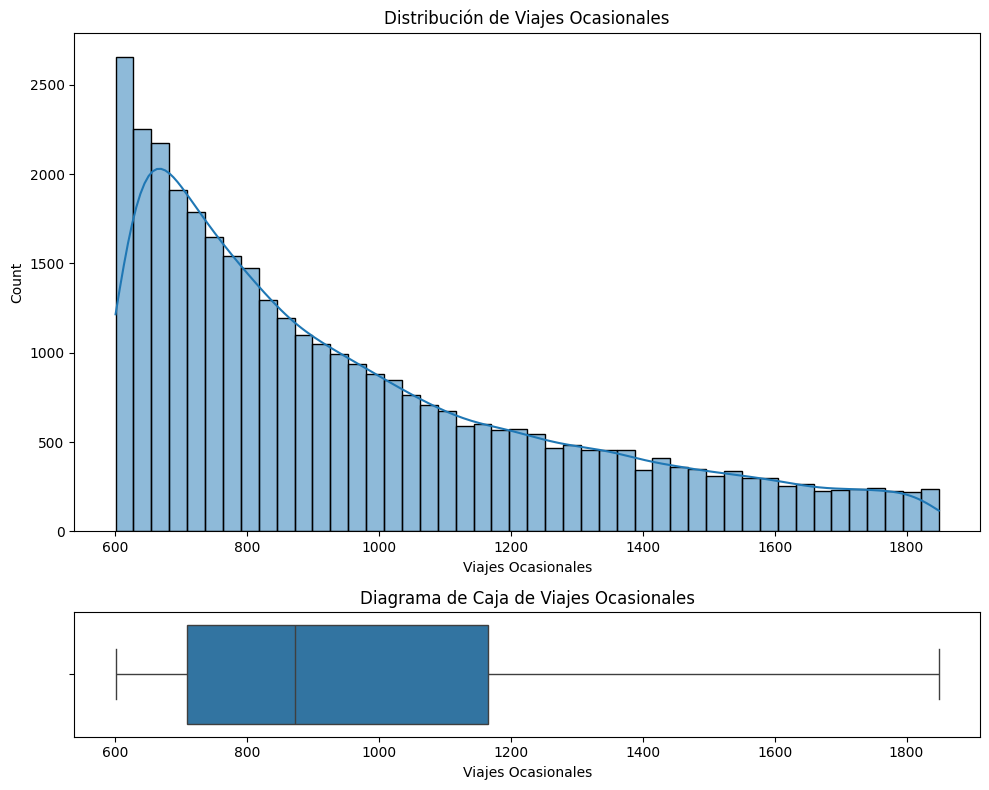

In [320]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [324]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>1850)&(total_combinaciones_viajes['Viajes Ocasionales']<4500)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
1926319,Puente Alto,Las Cabras,2020,2,1851
1953990,Puerto Montt,Santiago,2019,1,1851
358561,Chillán,Villarrica,2022,2,1851
1358971,Macul,Coquimbo,2022,2,1851
1949713,Puerto Montt,Pucón,2021,2,1851
...,...,...,...,...,...
2564706,Santiago,Algarrobo,2019,1,4487
1378074,Maipú,La Serena,2024,1,4488
1388891,Maipú,Valparaíso,2021,12,4490
1376289,Maipú,El Quisco,2022,4,4496


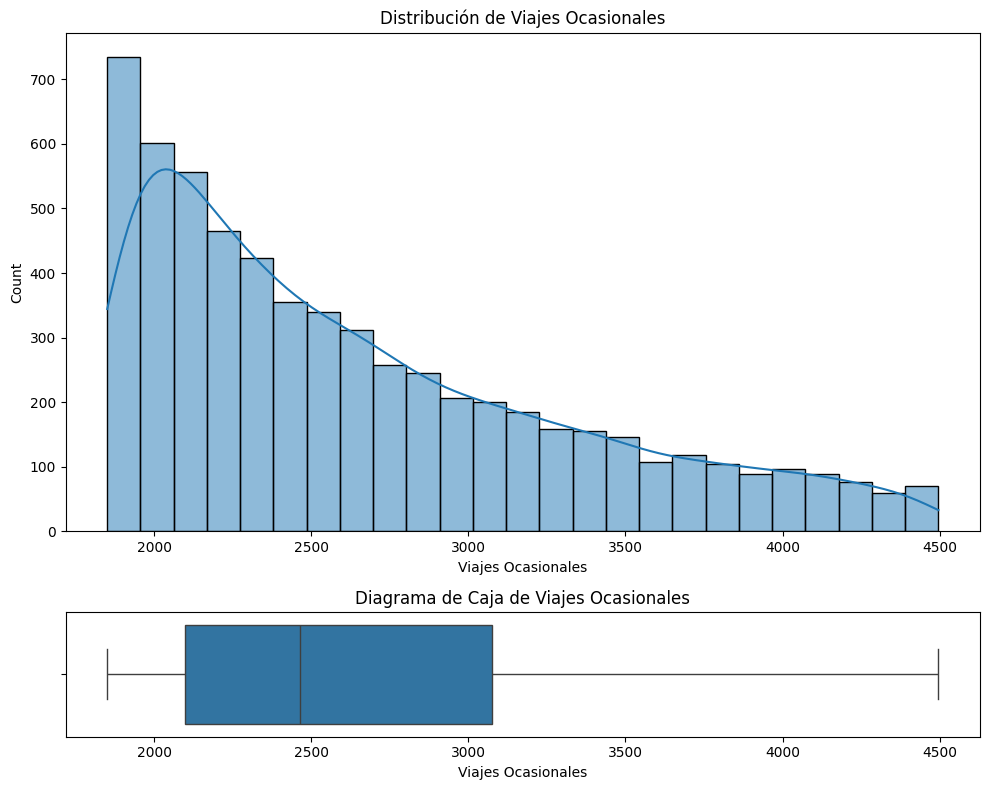

In [325]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [334]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>4500)&(total_combinaciones_viajes['Viajes Ocasionales']<9000)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
1113792,Las Condes,Viña del Mar,2019,7,4507
1034906,La Serena,Vicuña,2022,9,4507
589886,Coquimbo,Vicuña,2024,3,4508
150419,Calama,Antofagasta,2023,12,4509
2149159,Rancagua,Viña del Mar,2024,2,4510
...,...,...,...,...,...
2787691,Valparaíso,Olmué,2023,2,8858
357655,Chillán,Tomé,2020,2,8959
1113847,Las Condes,Viña del Mar,2024,2,8979
1378027,Maipú,La Serena,2020,2,8985


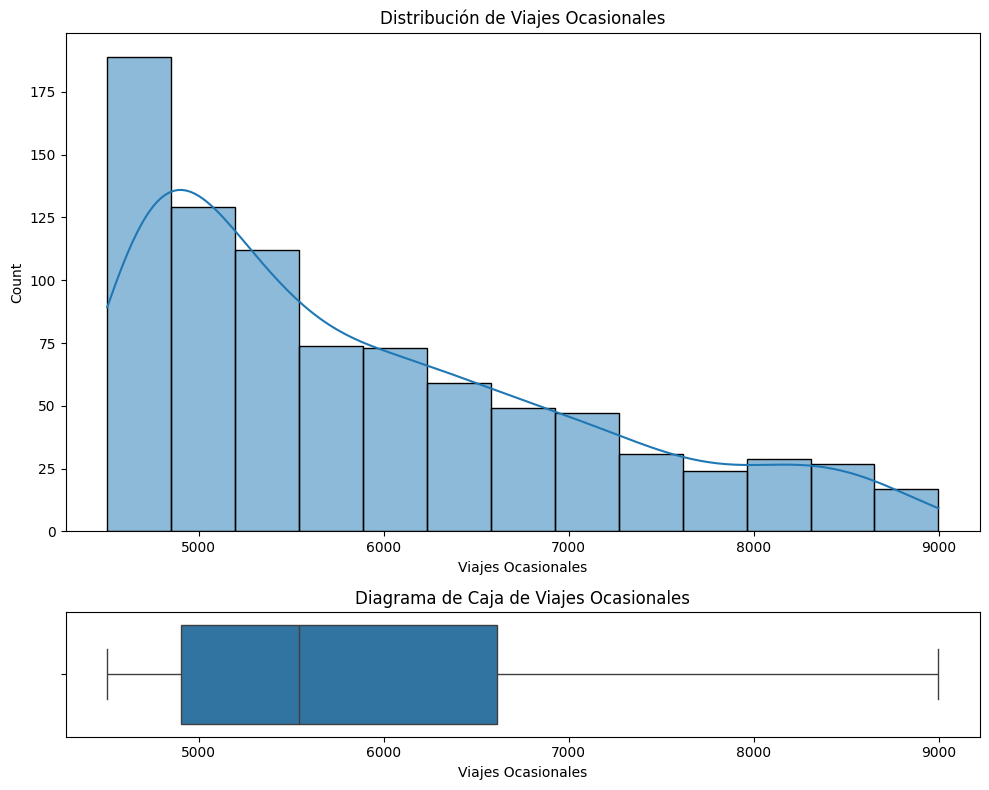

In [335]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [336]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>9000)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,Comuna Origen,Comuna Destino,Anio,CUT Mes,Viajes Ocasionales
561264,Copiapó,Caldera,2023,1,9024
654972,Curicó,Licantén,2019,1,9026
1924189,Puente Alto,El Quisco,2021,2,9043
1920829,Puente Alto,Cartagena,2020,2,9045
1376341,Maipú,El Tabo,2021,2,9110
...,...,...,...,...,...
2674207,Temuco,Villarrica,2020,2,16959
2142253,Rancagua,Pichilemu,2024,2,16987
1924177,Puente Alto,El Quisco,2020,2,17340
1924243,Puente Alto,El Tabo,2020,2,17375


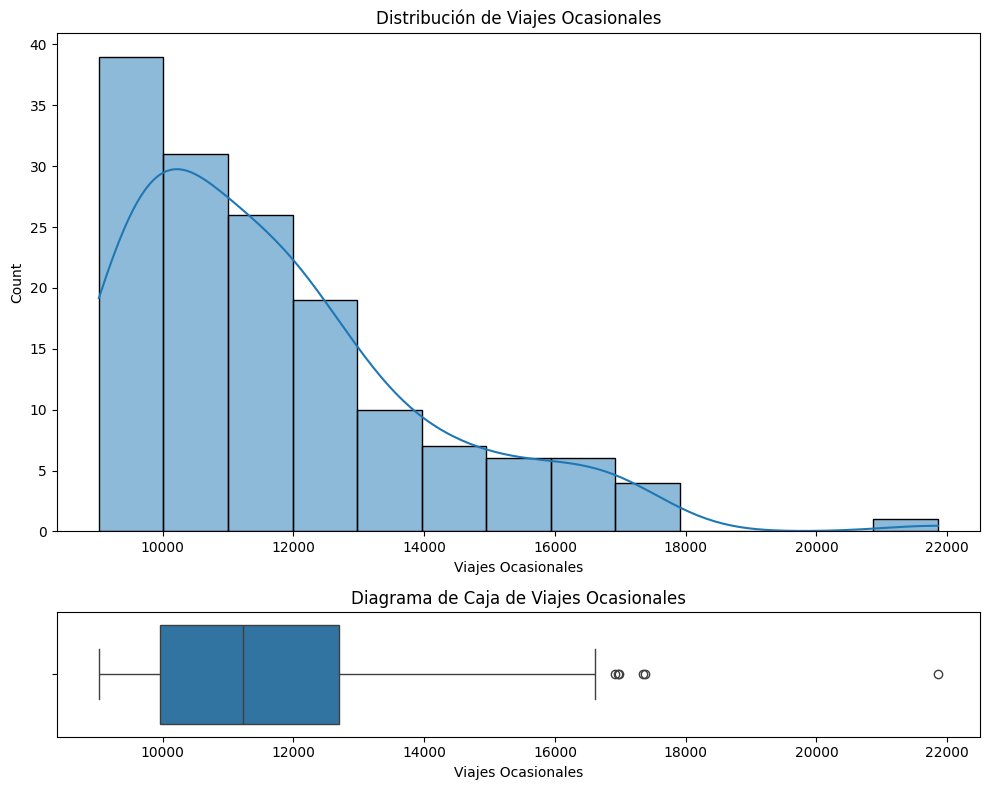

In [337]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()